In [1]:
import numpy as np
from numpy import linalg as LA
import math 
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def adjacencyMat(G):
    A = np.zeros((len(G.nodes()),len(G.nodes())))
    for i in range(0,len(G.nodes())):
        for j in range(0,len(G.nodes())):
            if (i+1,j+1) in G.edges():
                A[i,j] = 1
    return(A)

In [3]:
def weightedAdjMat(G):
    A = np.zeros((len(G.nodes()),len(G.nodes())))
    for i in range(0,len(G.nodes())):
        for j in range(0,len(G.nodes())):
            if (i+1,j+1) in G.edges():
                A[i,j] = G.get_edge_data(i+1,j+1).get('weight')
    return(A)

In [4]:
def time_graph(t_start,t_end):
    G = nx.DiGraph()
    plt.figure(figsize = (8,8))
    if (1 <= t_start < t_end <= 3):
        G.add_edge(1, 2, weight=1)
        G.add_edge(1, 5, weight=1)
        G.add_edge(1,7, weight=1)
        G.add_edge(2, 4, weight=1)
        G.add_edge(3, 1, weight=1)
        G.add_edge(3, 2, weight=1)
        G.add_edge(3, 5, weight=1)
        G.add_edge(6, 1, weight=1)
        G.add_edge(6, 2, weight=1)
        G.add_edge(6, 4, weight=1)
        G.add_edge(7, 1, weight=1)
        G.add_edge(7, 5, weight=1)
        G.add_edge(7, 6, weight=1)
    else:
        if (3 <= t_start < t_end <=5):
            G.add_edge(1, 2, weight=2)
            G.add_edge(1, 5, weight=3)
            G.add_edge(1,7, weight=4)
            G.add_edge(2, 4, weight=5)
            G.add_edge(3, 1, weight=6)
            G.add_edge(3, 2, weight=2)
            G.add_edge(3, 5, weight=4)
            G.add_edge(6, 1, weight=2)
            G.add_edge(6, 2, weight=1)
            G.add_edge(6, 4, weight=5)
            G.add_edge(7, 1, weight=2)
            G.add_edge(7, 5, weight=3)
            G.add_edge(7, 6, weight=1)
        else:
            if (5 <= t_start < t_end <=7):
                G.add_edge(1, 2, weight=2)
                G.add_edge(1, 5, weight=3)
                G.add_edge(1,7, weight=4)
                G.add_edge(2, 4, weight=5)
                G.add_edge(3, 1, weight=6)
                G.add_edge(3, 2, weight=2)
                G.add_edge(3, 5, weight=4)
                G.add_edge(6, 1, weight=2)
                G.add_edge(6, 2, weight=1)
                G.add_edge(6, 4, weight=5)
                G.add_edge(7, 1, weight=2)
                G.add_edge(7, 5, weight=3)
                G.add_edge(7, 6, weight=1)
                G.add_edge(5, 6, weight=2)
                G.add_edge(6, 5, weight=4)
                G.add_edge(4, 6, weight=4)      
            else: 
                if (7 <= t_start < t_end <= 9):
                    G.add_edge(1, 2, weight=1)
                    G.add_edge(1, 5, weight=1)
                    G.add_edge(1,7, weight=1)
                    G.add_edge(2, 4, weight=1)
                    G.add_edge(3, 1, weight=1)
                    G.add_edge(3, 2, weight=1)
                    G.add_edge(3, 5, weight=1)
                    G.add_edge(6, 1, weight=1)
                    G.add_edge(6, 2, weight=1)
                    G.add_edge(6, 4, weight=1)
                    G.add_edge(7, 1, weight=1)
                    G.add_edge(7, 5, weight=1)
                    G.add_edge(7, 6, weight=1)
                    G.add_edge(5, 6, weight=1)
                    G.add_edge(6, 5, weight=1)
                    G.add_edge(4, 6, weight=1)
                else:
                    print('Time interval must be subinterval of [1,9) with step 2')
    pos = nx.circular_layout(G)  # positions for all nodes
    arc_weight=nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_nodes(G, pos, node_size=700,node_color ='hotpink')
    nx.draw_networkx_edges(G, pos,  edgelist = G.edges, width=2, edge_color='deeppink', style='dashed',arrows=True,arrowsize = 25, arrowstyle='->', connectionstyle='arc3, rad = 0.1')
    nx.draw_networkx_edge_labels(G,pos= nx.circular_layout(G), edge_labels=arc_weight, font_size = 12, font_color='black')
    nx.draw_networkx_labels(G, pos, font_size=20)
    plt.axis('off')
    plt.show()
    return(G)

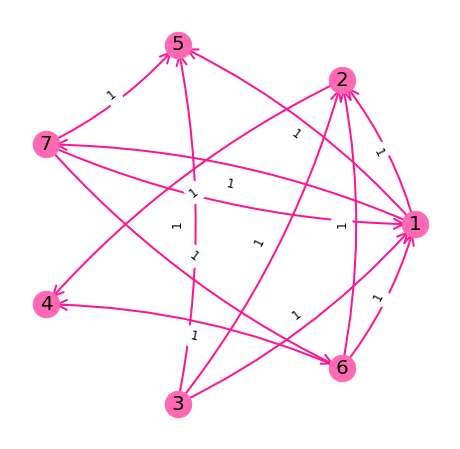

array([[0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0.]])

In [5]:
weightedAdjMat(time_graph(1,3))

# Algorithm 1: Temporal power iteration

In [6]:
def MatVecRight(A,x):
    return(A.dot(x))

In [7]:
def normalize(x):
    return(x/LA.norm(x))

In [8]:
def test_dif(x,y):
    return(np.max(LA.norm(x-y)))

In [9]:
def scalProd(x,y):
    return(np.dot(x,y))

In [10]:
def eigTemp(A, x, tol = 10**(-6), maxIter = 100):
    i = 0
    convergence = False
    while (i < maxIter):
        x_old = x
        x = normalize(MatVecRight(A, x))
        if (test_dif(x, x_old) < tol):
            convergence = True
            break
        i = i + 1
    ev = scalProd(x, MatVecRight(A, x))
    return (x, ev, convergence)


# Algorithm 2: Temporal eigenvalue centrality

In [11]:
def MatTrans(A):
    return(np.transpose(A))

In [12]:
def VecConst(n):
    return(np.ones(n))

In [13]:
def numInv(a):
    return(1/a)

In [14]:
def numVecProd(a,x):
    return(a*x)

In [15]:
def inEig(A):
    (x, ev, conv) = eigTemp(MatTrans(A), VecConst(A.shape[0]))
    x = numVecProd(numInv(ev), x)
    return (x, conv)

In [16]:
def outEig(A):
    (x, ev, conv) = eigTemp(A, VecConst(A.shape[0]))
    x = numVecProd(numInv(ev), x)
    return (x, conv)

# Algorithm 3: Temporal Jacobi iteration

In [17]:
def diag(A):
    B = A.copy()
    for i in range(0,A.shape[0]):
        for j in range(0,A.shape[1]):
            if (i != j):
                B[i][j] = 0
    return(B)

In [18]:
def MatSetDiagZero(A):
    n = A.shape[0]
    B = A.copy()
    for i in range(0,n):
        B[i][i] = 0
    return(B)

In [19]:
def MatMinus(A):
    return(-A)

In [20]:
def VecSum(x,y):
    return(x+y)

In [21]:
def jacobi(A, b, x, tol = 10**(-6), maxIter = 100):
    invD = np.linalg.inv(diag(A))
    B = MatMinus(MatSetDiagZero(A))
    i = 0
    convergence = False
    while (i < maxIter):
        i = i + 1
        xn = MatVecRight(invD, VecSum(MatVecRight(B, x), b))
        if test_dif(x, xn) < tol:
            convergence = True
            break
        x = xn
        return (xn, convergence)


# Algorithm 4: Temporal Katz centrality

In [22]:
def MatVecLeft(A,x):
    return(x.dot(A))

In [23]:
def factorial(n):
    return(math.factorial(n))

In [24]:
def katz(A, a = None):
    n = A.shape[0]
    d = MatVecLeft(A, VecConst(n))
    if (a == None):
        max = 0
        for i in range(1, len(d)):
            if (d[i] > max):
                max = d[i]
        a = 0.999/max
    B = np.zeros((n,n))
    for i in range(0, n): 
        B[i][i] =  1/a
    B = B - MatTrans(A)
    (t, conv) = jacobi(B, d, VecConst(n)) #solution of B*t=d
    m = factorial(n - 1) * (a ** (n - 1)) * math.exp(1/a)
    m =  1/m * np.ones(len(t))
    return (numVecProd(m, t), conv)

# Algorithm 5 Temporal Bonacich α−centrality

In [25]:
def MatEye(n):
    return(np.identity(n))

In [26]:
def alpha(A, a, s = None):
    if (s == None):
        s = VecConst(A.shape[0])
    return(jacobi(MatEye(A.shape[0]) - a * MatTrans(A), s, VecConst(A.shape[0])))

# Algorithm 6 Temporal Bonacich (α, β)−centrality

In [27]:
def bonacich(A, b, a = None):
    normB = False
    if (a == None):
        a = 1
        normB = True
    b1 = numVecProd(a, MatVecRight(A, VecConst(A.shape[0])))
    B = MatEye(A.shape[0]) - (b * A)
    (x, conv) = jacobi(B, b1, VecConst(len(A)))
    if (normB == True): 
        x = numVecProd(np.sqrt(A.shape[0]), normalize(x))
    return(x, conv)

# Algorithm 7 Power iteration for computing the eigenvalues of AT A

In [28]:
def singTemp(A, x, tol = 10**(-6), maxIter = 100):
    i = 0
    convergence = False
    while (i < maxIter):
        x_old = x
        x = normalize(MatVecRight(MatTrans(A), MatVecRight(A, x)))
        if (test_dif(x, x_old) < tol):
            convergence = True
            break
        i = i + 1
    ev = scalProd(x, MatVecRight(MatTrans(A), MatVecRight(A, x)))
    return (x, ev, convergence)

# Algorithm 8 Hubs and authorities (HITS algorithm)

In [29]:
def hits(A):
    (y, evy, conv) = singTemp(A, VecConst(A.shape[0]))
    x = normalize(MatVecRight(A, y))
    evInv = numInv(evy)
    y = numVecProd(evInv, y)
    x = numVecProd(evInv, x)
    return (x, y, conv) 

# Algorithm 9 The temporal PageRank algorithm

In [30]:
def vecInvPR(S,s):
    n = S.shape[0]
    if 0 in s:
        S_out = np.zeros((n,n))
        s_out = np.ones(n) * 1/n
        i = np.where(s == 0)
        S_out[i,:] = 1
    else:
        S_out = S
        s_out = 1/s
    return(S_out,s_out)

In [43]:
a = np.array([1,2,1,4,5,6])
np.where(a==1)

(array([0, 2], dtype=int64),)

In [31]:
def DiagMatProd(x,A):
    n = A.shape
    X = np.zeros(n)
    for i in range(0,n[0]):
        X[i][i] = x[i]
    return(X.dot(A))

In [32]:
def constantMat(n,a):
    A = np.ones((n,n))
    return(a*A)

In [33]:
def norm1(x):
    return(x/LA.norm(x,1))

In [34]:
def pageRank(A, q = 0.15):
    n = A.shape[0] 
    S = np.zeros((n,n))
    s = MatVecRight(A, VecConst(n)) #vector of outdegrees
    (S, s) = vecInvPR(S, s) 
    S = A + S
    S = DiagMatProd(s, S)
    M = (1 - q) * S  +  q * constantMat(n, 1/n)
    (x, ev, conv) = eigTemp(MatTrans(M), VecConst(n))
    x = norm1(x)
    return (x, conv)

# Results on example from the paper

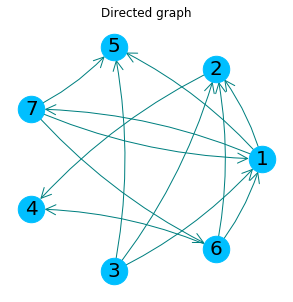

In [36]:
# plt.figure(figsize = (5,5))
# G1 = nx.DiGraph()   # class for directed graphs
# G1.add_edges_from([(1,2),(1,5),(1,7),(2,4),(3,1),(3,2),(3,5),(6,1),(6,2),(6,4),(7,1),(7,5),(7,6)])
# plt.title('Directed graph')
# pos = nx.circular_layout(G1)
# nx.draw_networkx(G1,pos, font_size=20, node_size = 700, node_color ='deepskyblue', edge_color='teal',arrowsize = 25, arrowstyle='->', connectionstyle='arc3, rad = 0.1')
# plt.axis('off')
# plt.show()

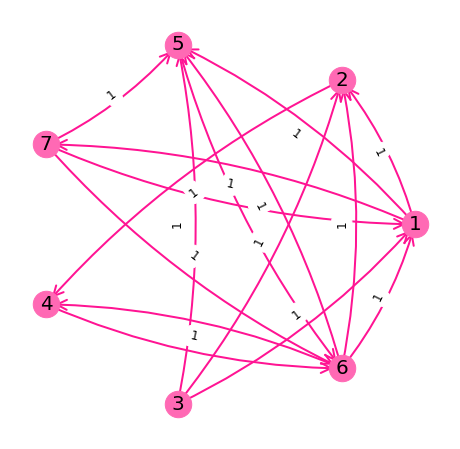

array([[0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 1., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0.]])

In [37]:
G = time_graph(7,9)
A = weightedAdjMat(G)
A

In [62]:
def measures(A):
    in_eig = list(np.argsort(inEig(A)[0])+1)[::-1]
    out_eig = list(np.argsort(outEig(A)[0])+1)[::-1]
    katz_a = list(np.argsort(katz(A, a = 0.15)[0])+1)[::-1]
    bonacich_a = list(np.argsort(alpha(A,0.85)[0])+1)[::-1]
    bonacich_b = list(np.argsort(bonacich(A,0.15)[0])+1)[::-1]
    hub = list(np.argsort(hits(A)[0])+1)[::-1]
    authority = list(np.argsort( hits(A)[1])+1)[::-1]
    page_rank = list(np.argsort(pageRank(A)[0])+1)[::-1]
    print('in-eig:\t\t',in_eig,'\nout-eig:\t',out_eig, '\nkatz a=0.15:\t',katz_a,'\nbonacich a=0.85:',bonacich_a,
         '\nbonacich b=0.85:',bonacich_b,'\nhub:\t\t',hub,'\nauthority:\t',authority,'\npageRank q=0.15:',page_rank)

In [63]:
measures(A)

in-eig:		 [6, 5, 4, 2, 1, 7, 3] 
out-eig:	 [7, 6, 1, 3, 5, 4, 2] 
katz a=0.15:	 [5, 6, 2, 1, 4, 7, 3] 
bonacich a=0.85: [5, 6, 2, 1, 4, 7, 3] 
bonacich b=0.85: [6, 7, 3, 1, 5, 4, 2] 
hub:		 [6, 3, 7, 1, 2, 5, 4] 
authority:	 [5, 1, 2, 4, 6, 7, 3] 
pageRank q=0.15: [6, 4, 5, 2, 1, 7, 3]


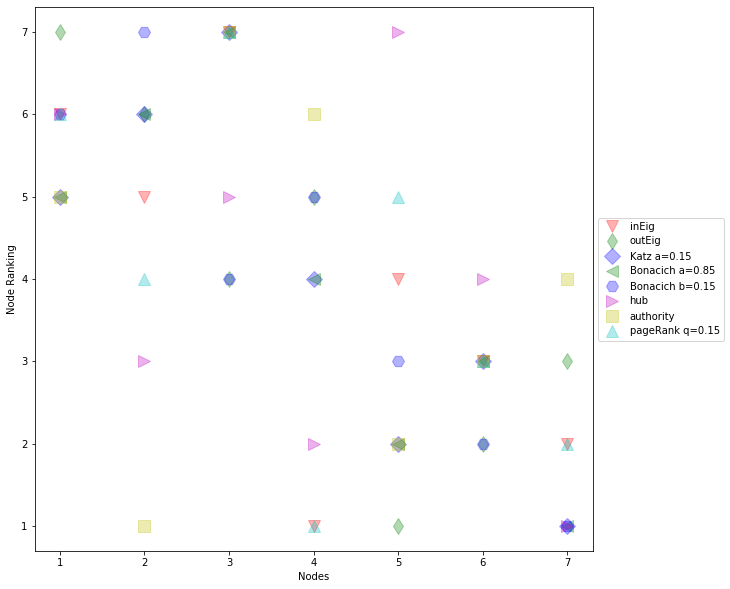

In [40]:
plt.figure(figsize = (10,10))
plt.plot(list(G.nodes), list(np.argsort(inEig(A)[0])+1)[::-1], 'rv',linewidth=0.5,markersize=12, label = 'inEig', alpha=.3)
plt.plot(list(G.nodes), list(np.argsort(outEig(A)[0])+1)[::-1], 'gd',markersize=12, label = 'outEig', alpha=.3)
plt.plot(list(G.nodes), list(np.argsort(katz(A, a = 0.15)[0])+1)[::-1], 'bD',markersize=12, label = 'Katz a=0.15', alpha=.3)
plt.plot(list(G.nodes), list(np.argsort(alpha(A,0.85)[0])+1)[::-1], 'g<',markersize=12, label = 'Bonacich a=0.85', alpha=.3)
plt.plot(list(G.nodes), list(np.argsort(bonacich(A,0.15)[0])+1)[::-1], 'bH',markersize=12, label = 'Bonacich b=0.15', alpha=.3)
plt.plot(list(G.nodes), list(np.argsort(hits(A)[0])+1)[::-1], 'm>',markersize=12, label = 'hub', alpha=.3)
plt.plot(list(G.nodes), list(np.argsort(hits(A)[1])+1)[::-1], 'ys',markersize=12, label = 'authority', alpha=.3)
plt.plot(list(G.nodes), list(np.argsort(pageRank(A)[0])+1)[::-1], 'c^',markersize=12, label = 'pageRank q=0.15', alpha=.3)

plt.xlabel('Nodes')
plt.ylabel('Node Ranking')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

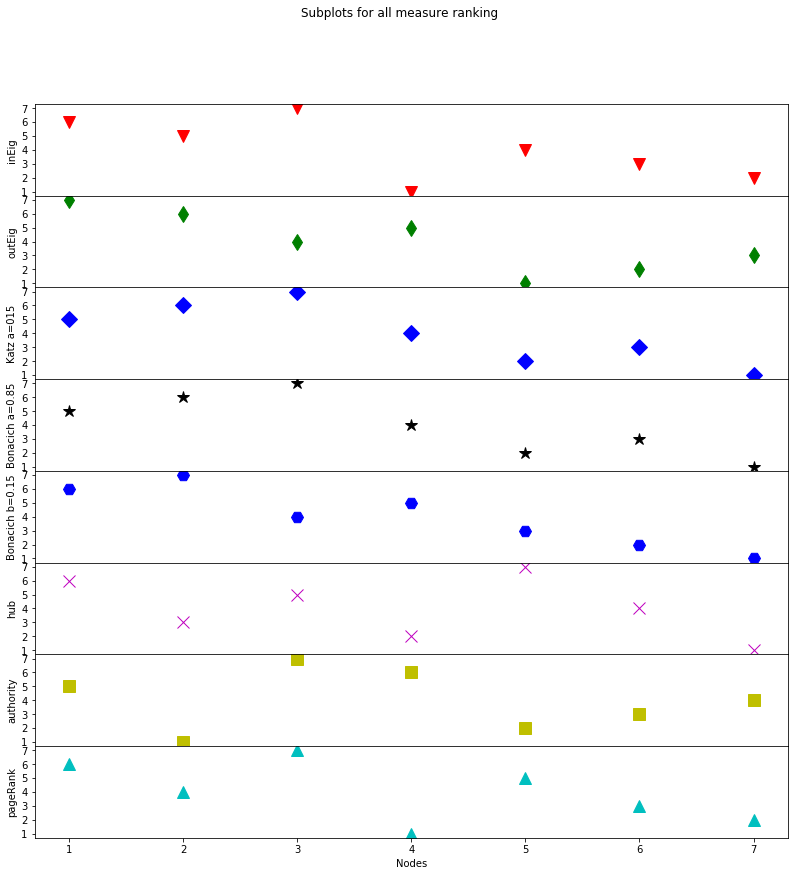

In [41]:
fig, axs = plt.subplots(8, figsize=(13.5,13.5),sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.suptitle('Subplots for all measure ranking')
axs[0].plot(list(G.nodes), list(np.argsort(inEig(A)[0])+1)[::-1], 'rv',linewidth=0.5,markersize=12, label = 'inEig')
axs[1].plot(list(G.nodes), list(np.argsort(outEig(A)[0])+1)[::-1], 'gd',markersize=12, label = 'outEig')
axs[2].plot(list(G.nodes), list(np.argsort(katz(A, a = 0.15)[0])+1)[::-1], 'bD',markersize=12, label = 'Katz a=0.15')
axs[3].plot(list(G.nodes), list(np.argsort(alpha(A,0.85)[0])+1)[::-1], 'k*',markersize=12, label = 'Bonacich a=0.85')
axs[4].plot(list(G.nodes), list(np.argsort(bonacich(A,0.15)[0])+1)[::-1], 'bH',markersize=12, label = 'Bonacich b=0.15')
axs[5].plot(list(G.nodes), list(np.argsort(hits(A)[0])+1)[::-1], 'mx',markersize=12, label = 'hub')
axs[6].plot(list(G.nodes), list(np.argsort(hits(A)[1])+1)[::-1], 'ys',markersize=12, label = 'authority')
axs[7].plot(list(G.nodes), list(np.argsort(pageRank(A)[0])+1)[::-1], 'c^',markersize=12, label = 'pageRank q=0.15')
axs[0].set_ylabel('inEig')
axs[1].set_ylabel('outEig')
axs[2].set_ylabel('Katz a=015')
axs[3].set_ylabel('Bonacich a=0.85')
axs[4].set_ylabel('Bonacich b=0.15')
axs[5].set_ylabel('hub')
axs[6].set_ylabel('authority')
axs[7].set_ylabel('pageRank')
labels = np.arange(1,8,1)
plt.yticks(labels, labels)
plt.xlabel('Nodes')
plt.savefig('node_measures')
plt.show()